# Corto 1

## Parte 1

### Task 1

Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la
probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en
otras palabras, el número promedio de huracanes por año es de 7.

1. ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?
- Este evento si puede ser modelado con una variable de Poisson , ya que se cuenta con la frecuencia a la que ocurren los eventos, en este caso los huracanas, y el intervalo de tiempo en el que ocurren.  

2. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass
function) de estos eventos

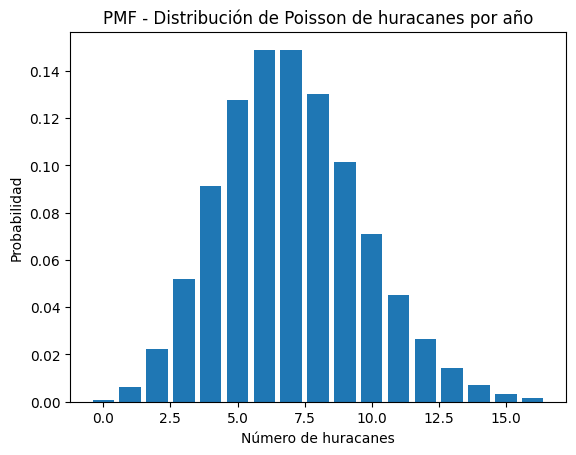

In [15]:
import matplotlib.pyplot as plt
import math

def poisson_pmf(lam, k):
    return (lam ** k * math.exp(-lam)) / math.factorial(k)


lam = 7
max_hurricanes = 16

x_values = list(range(max_hurricanes + 1))
pmf_values = [poisson_pmf(lam, k) for k in x_values]

plt.bar(x_values, pmf_values)
plt.xlabel('Número de huracanes')
plt.ylabel('Probabilidad')
plt.title('PMF - Distribución de Poisson de huracanes por año')
plt.show()


3. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative
distribution function) de estos eventos

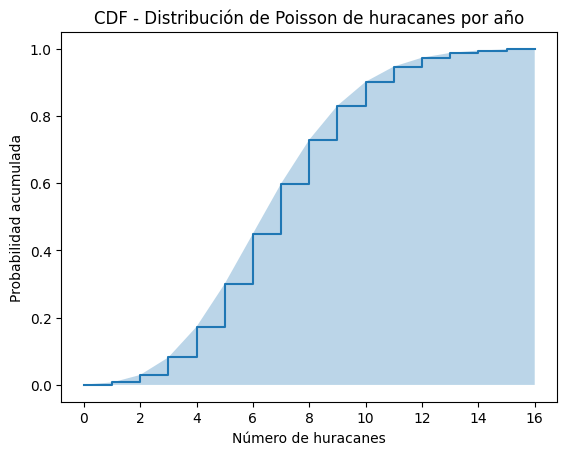

In [16]:
def poisson_cdf(lam, k):
    cdf = 0
    for i in range(k + 1):
        cdf += poisson_pmf(lam, i)
    return cdf

cdf_values = [poisson_cdf(lam, k) for k in x_values]

plt.step(x_values, cdf_values, where='post')
plt.fill_between(x_values, cdf_values, alpha=0.3)
plt.xlabel('Número de huracanes')
plt.ylabel('Probabilidad acumulada')
plt.title('CDF - Distribución de Poisson de huracanes por año')
plt.show()


4. ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?
- En la grafica de la PMF se puede observar como el punto mas alto es 7, la cual es la media de la ocurrecia de huracanes. Mientras los datos se alejan de este valor la ocurrencia de huracanes es menor.
- En la grafica de CDF muestra la probabilidad que ocurran cierta cantidad de huracanes durante un año. A medida que la cantidad de huracanes aumenta la probabilidad de que ocurran aumenta igualmente. Al llegar al máximo número de huracanes es 1, lo que significa que la probabilidad que ocurran 16 o menos huracanes en el año es 1.

### Task 2

Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.

### Task 2.1

Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

1. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución de Poisson.

In [17]:
import numpy as np
from scipy.stats import poisson

def poisson_inverse_cdf(p, lam):
    x = 0
    cdf = 0
    while cdf < p:
        cdf += poisson_pmf(lam, x)
        x += 1
    return x - 1

lam = 10
size = 1000





2. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una
hora.

In [18]:
random_sample = [poisson_inverse_cdf(np.random.rand(), lam) for _ in range(size)]

3. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

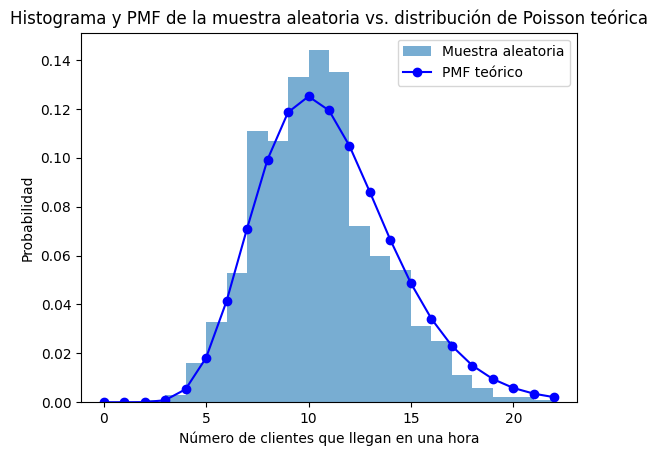

In [19]:
plt.hist(random_sample, bins=range(max(random_sample) + 1), density=True, alpha=0.6, label='Muestra aleatoria')
x = np.arange(0, max(random_sample) + 1)
pmf_values = [poisson.pmf(lam, k) for k in x]
plt.plot(x, pmf_values, 'bo-', label='PMF teórico')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')
plt.title('Histograma y PMF de la muestra aleatoria vs. distribución de Poisson teórica')
plt.legend()
plt.show()

4. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

In [20]:
sample_mean = np.mean(random_sample)
sample_variance = np.var(random_sample)
theoretical_mean = lam
theoretical_variance = lam

print("Media de la muestra generada:", sample_mean)
print("Varianza de la muestra generada:", sample_variance)
print("Media teórica de la distribución de Poisson:", theoretical_mean)
print("Varianza teórica de la distribución de Poisson:", theoretical_variance)

Media de la muestra generada: 9.973
Varianza de la muestra generada: 8.950271
Media teórica de la distribución de Poisson: 10
Varianza teórica de la distribución de Poisson: 10


Al observar los valores teoricos y los valores obtenidos de las muestras generadas se puede observar que son basntante similares. Esto se debe a que el comportamiento de poisson si se presenta pero al ser aleatorio no va a ser completamente perfecto. Talvez si se agregan mas muestras se podria obtener un resultado mas cercano a los valores teoricos.

### Task 2.2

Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

1. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte
de la distribución de Poisson.

In [64]:
from scipy.stats import poisson, geom
import numpy as np

lambda_poisson = 10  # Parámetro lambda para la distribución de Poisson.
p_geom = 1 / (lambda_poisson + 1)  # Parámetro para la distribución geométrica.

C = max(poisson.pmf(k, lambda_poisson) / geom.pmf(k + 1, p_geom) for k in range(0, 100))
print("C:", C)



C: 3.5695353301798556


2. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.

In [65]:
def rejection_sampling(n):
    samples = []
    while len(samples) < n:
        y = np.random.geometric(p_geom) - 1
        u = np.random.uniform(0, 1)
        if u < poisson.pmf(y, lambda_poisson) / (C * geom.pmf(y + 1, p_geom)):
            samples.append(y)
    return samples


3. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora
utilizando el método de rechazo.

In [66]:
sample = rejection_sampling(1000)


4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

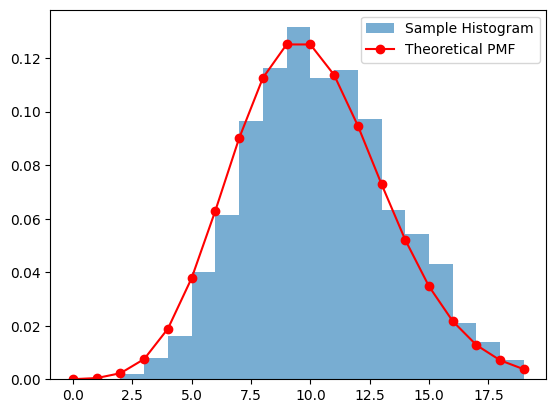

In [69]:
import matplotlib.pyplot as plt

plt.hist(sample, bins=range(20), density=True, alpha=0.6, label="Sample Histogram")
plt.plot([poisson.pmf(k, lambda_poisson) for k in range(20)], 'ro-', label="Theoretical PMF")
plt.legend()
plt.show()



5. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

In [68]:
sample_mean = np.mean(sample)
sample_var = np.var(sample)
theoretical_mean = lambda_poisson
theoretical_var = lambda_poisson

print(f"Sample mean: {sample_mean}, Theoretical mean: {theoretical_mean}")
print(f"Sample variance: {sample_var}, Theoretical variance: {theoretical_var}")


Sample mean: 9.992, Theoretical mean: 10
Sample variance: 9.963935999999999, Theoretical variance: 10


## Preguntas

1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de
Poisson objetivo?
- En mi caso el que mejor se ajusta a la distribución de Poisson es el metodo de rechazo. Esto se puede ver en el histograma que resultaba. De igual manera los valores de la media y la varianza son mas cercanos a los teoricos en este caso. 

2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.
- Ventajas Transformacion inversa:
    - Es más simple que el metodo de rechazo.
    - La implementación es directa y bastante precisa.

- Desventajas Transformacion inversa:
    - Tiende a ser menos eficiente cuando el valor de lambda es muy grande.
    - Este método solo esta adaptado para la distribución de Poisson.

- Ventajas Metodo de rechazo:
    - Para valores altos de lambda es más eficiente que el metodo de transformacion inversa.
    - Permite el uso de diversas distribuciones de probabilidad.

- Desventajas Metodo de rechazo:
    - Se vuelve mas complicado por la seleccion de una distribucion a trabajar y el calculo de la constante.
    - Una mala eleccion de la distribucion puede llevar a una alta tasa de rechazo.


3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes
distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?
- Si se aumenta lambda:
    - La transformación inversa se vuelve menos eficiente a medida que aumenta lambda
    - El método de rechazo se requiere una reoptimización y recalcular la constante.

Tambien existe la posibilidad de usar diferentes distribuciones para poder modelar los datos de mejor manera. 